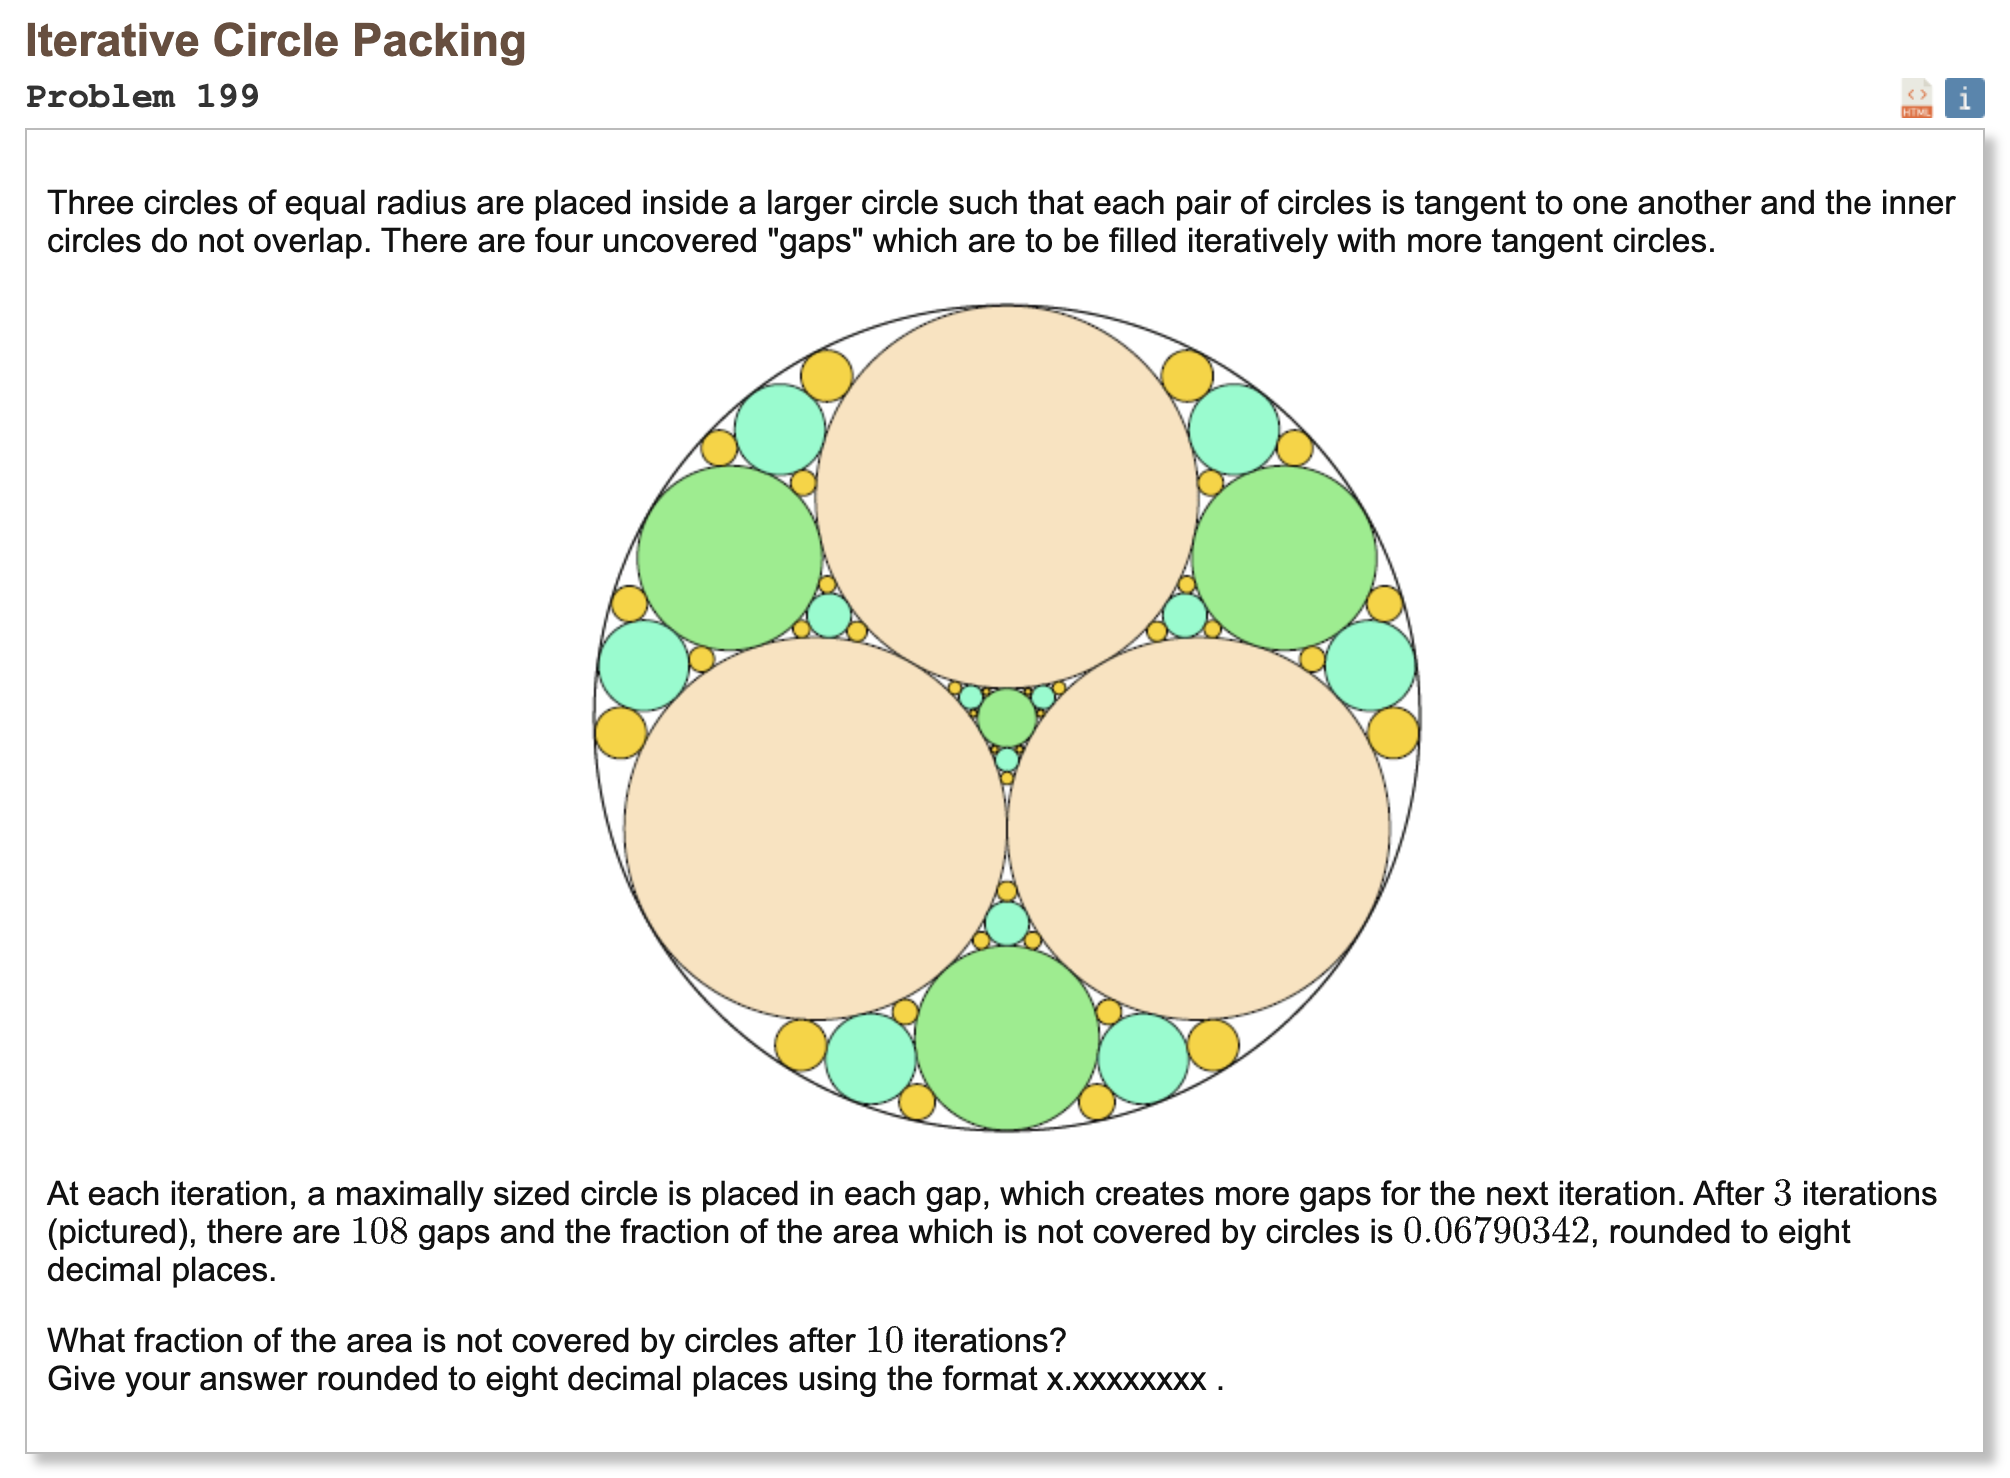

## Initial approach

* treat each circle by its curvature k = 1/r, with the outer circle having negative curvature
* set the three starting inner circles to radius 1 so their curvature is 1, then get the outer circle curvature from descartes theorem
* each uncovered gap is bounded by three mutually tangent circles, from their three curvatures you can compute the new circle curvature using descartes again
* the new circle is the one with larger curvature (smaller radius), because we want the maximally sized circle that fits in the gap
* when you place that circle, the old gap splits into three new gaps made from the new circle plus each pair of the old boundary circles
* repeat this gap filling level by level for n iterations, summing the areas of all circles you place
* divide uncovered area by the outer circle area, then round to eight decimals

In [1]:
import math

def new_curvature(k1, k2, k3):
    s = k1 * k2 + k2 * k3 + k3 * k1
    return k1 + k2 + k3 + 2.0 * math.sqrt(s)

def uncovered_fraction(iterations):
    k_inner = 1.0
    k_outer = 3.0 - 2.0 * math.sqrt(3.0)
    r_outer = -1.0 / k_outer

    outer_area = math.pi * r_outer * r_outer
    covered_area = 3.0 * math.pi

    gaps = [(k_inner, k_inner, k_inner)]
    gaps.extend([(k_outer, k_inner, k_inner)] * 3)

    for _ in range(iterations):
        next_gaps = []
        for a, b, c in gaps:
            k_new = new_curvature(a, b, c)
            covered_area += math.pi / (k_new * k_new)
            next_gaps.append((a, b, k_new))
            next_gaps.append((a, c, k_new))
            next_gaps.append((b, c, k_new))
        gaps = next_gaps

    return (outer_area - covered_area) / outer_area

In [2]:
%%time
n = 10
result = uncovered_fraction(n)
print("Result:", f"{result:.8f}")

Result: 0.00396087
CPU times: user 58.5 ms, sys: 6.47 ms, total: 64.9 ms
Wall time: 63.8 ms
